In [1]:
pip install scikit-fuzzy



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\pisca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install paho-mqtt

     ---------------------------------------- 0.0/99.4 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/99.4 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/99.4 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/99.4 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/99.4 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/99.4 kB ? eta -:--:--
     ------------ -------------------------- 30.7/99.4 kB 81.9 kB/s eta 0:00:01
     ------------ -------------------------- 30.7/99.4 kB 81.9 kB/s eta 0:00:01
     ------------ -------------------------- 30.7/99.4 kB 81.9 kB/s eta 0:00:01
     ------------ -------------------------- 30.7/99.4 kB 81.9 kB/s eta 0:00:01
     ------------ -------------------------- 30.7/99.4 kB 81.9 kB/s eta 0:00:01
     ------------ -------------------------- 30.7/99.4 kB 81.9 kB/s eta 0:00:01
     --------------------------- ---------- 71.7/99.4 kB 119.1 kB/s eta 0:00:01
   


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\pisca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client("c213Inatelsbm")
client.connect(mqttBroker)

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-8, 19, 1), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'varerrotemp')
resfriador =ctrl.Consequent(np.arange(0, 100, 1), 'resfriador')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -2,-1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-2,-1,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[1, 2, 18,18])
# You can see how these look with .view()
errotemp.view()

ModuleNotFoundError: No module named 'matplotlib'

C:\RoboDK\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


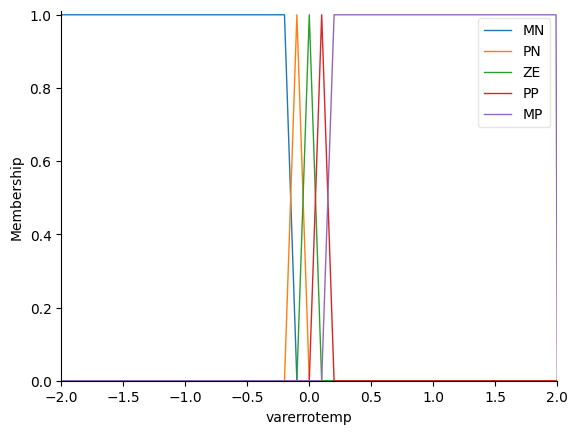

In [23]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-2, -2, -0.2,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 2,2])

# You can see how these look with .view()
varerrotemp.view()

C:\RoboDK\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


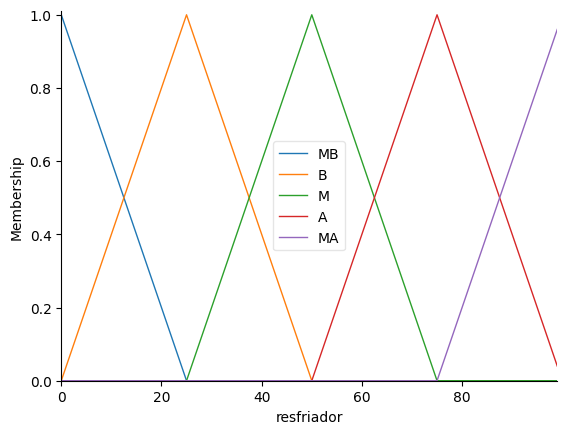

In [24]:
resfriador['MB'] = fuzz.trimf(resfriador.universe, [0,0,25])
resfriador['B'] = fuzz.trimf(resfriador.universe, [0,25,50])
resfriador['M'] = fuzz.trimf(resfriador.universe, [25, 50, 75])
resfriador['A'] = fuzz.trimf(resfriador.universe, [50, 75, 100])
resfriador['MA'] = fuzz.trimf(resfriador.universe, [75, 100, 100])
resfriador.view()

In [31]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], resfriador['MB'])
regra2 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], resfriador['MB'])
regra3 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], resfriador['MB'])
regra4 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], resfriador['MB'])
regra5 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], resfriador['B'])
regra6 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], resfriador['B'])
regra7 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], resfriador['B'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], resfriador['M'])
regra9 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], resfriador['M'])
regra10 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], resfriador['M'])
regra11 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], resfriador['A'])
regra12 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], resfriador['A'])
regra13 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], resfriador['M'])
regra14 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], resfriador['A'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], resfriador['MA'])
regra16 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], resfriador['A'])
regra17 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], resfriador['A'])
regra18 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], resfriador['MA'])
regra19 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], resfriador['M'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], resfriador['A'])
regra21 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], resfriador['MA'])
regra22 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], resfriador['MA'])
regra23 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], resfriador['MA'])
regra24 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], resfriador['M'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], resfriador['A'])

In [30]:
resfriador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
controle = ctrl.ControlSystemSimulation(resfriador_ctrl)

In [34]:
from logging import setLogRecordFactory
#Parematros do sistema 
entrada = int(input('Digite um modo de 1 a 3'))
setpoint = 0 
if entrada == 1:
    setpoint = -2
elif entrada == 2:
    setpoint = -6
elif entrada == 3:
    setpoint = -8
else:
  print("Entrada invalida")

tempatual = 0 
erroanterior= tempatual - setpoint 

while True:
  controle.input['errotemp'] = erroanterior
  erroatual = tempatual - setpoint
  varerroTemp = erroatual - erroanterior

  controle.input['errotemp'] =  erroatual
  controle.input['varerrotemp'] = varerroTemp
  controle.compute()

  while tempatual > setpoint:
    tempatual = tempatual * 0.997 - 0.0003 * controle.output['resfriador']
    time.sleep(1)

    print(f"Potência do resfriador: {controle.output['resfriador']}%")
    print(f"Sensor de temperatura: {tempatual} °C")
    print(f"Erro atual: {erroatual}")




4
5.1730133849028945
6.293171505961595
7.36285598895463
8.384341145063328
9.359798806401768
10.291302943660728
11.180834075683387
12.030283480348283
12.841457215712461
13.616079959964374
14.355798678350856
15.062186124874616
15.736744186207407
16.380907074928487


KeyboardInterrupt: 